"\n# Execute the circuit\nbackend = Aer.get_backend('qasm_simulator')\ntranspiled_grover_circuit = transpile(grover_circuit, backend)\nqobj = assemble(transpiled_grover_circuit)\nresults = execute(grover_circuit, backend, shots=1024).result()\n"

{'001': 126, '100': 144, '011': 104, '101': 120, '111': 136, '010': 131, '000': 154, '110': 109}


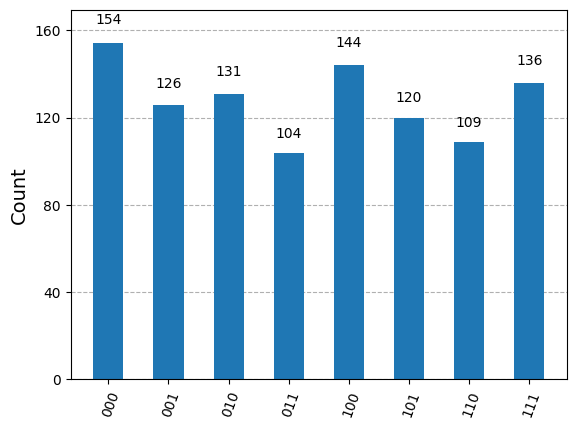

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from qiskit.visualization import plot_bloch_multivector

InteractiveShell.ast_node_interactivity = "all"
from numpy import pi

# Define the oracle for |101>
def oracle_101(circuit):
    circuit.x(0)
    circuit.cx(0, 1)
    circuit.ccx(1, 2, 0)
    circuit.cx(0, 1)
    circuit.x(0)

# Define the Grover diffusion operator
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply Hadamard gates
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply X gates
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mcx(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply X gates
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply Hadamard gates
    for qubit in range(nqubits):
        qc.h(qubit)
    # Convert diffuser to a gate
    U_s = qc.to_gate()
    U_s.name = "Diffuser"
    return U_s

# Number of qubits
nqubits = 3
grover_circuit = QuantumCircuit(nqubits)

# Initialize with Hadamard gates
grover_circuit.h(range(nqubits))

# Apply the oracle
oracle_101(grover_circuit)

# Apply the diffuser
grover_circuit.append(diffuser(nqubits), range(nqubits))

# Measure the results
grover_circuit.measure_all()
"""
# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, backend)
qobj = assemble(transpiled_grover_circuit)
results = execute(grover_circuit, backend, shots=1024).result()
"""
backend = Aer.get_backend('qasm_simulator')
#transpiled_circuit = transpile(grover_circuit, backend)

nc = transpile(grover_circuit,backend)
job = backend.run(nc)
results = job.result()
counts = results.get_counts()


# Plot the results
print(counts)
plot_histogram(counts)